<a href="https://colab.research.google.com/github/devink07/deep-learning-UoC/blob/main/Deep_Learning_Colab_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1:  Setting up your environment
In order to use Colab with the required NN libarries we need to install any that are not available by default on to your cloud instance 

In [ ]:
# import the libraries we will be using for our workshop 
# standard data science libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Using Sci-kit learn to do the preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#Tensorflow
import tensorflow as tf
from keras.utils.vis_utils import plot_model

#interactive display of data
%load_ext google.colab.data_table

# Section 2: Motivating example
Modelling the relationship between Farhenheit and Celsius

## 2.1 Define the real world function
Using a basic neural network let us try and approximate a function which converts degrees Celsius to Fahrenheit

In reality, we won't have access to this function. But just for the sake of the experiment we will be using this


## 2.2 Extract the data

In [ ]:
celsius_array = np.array([-40, -10,  0,  8, 15, 22,  38])
fahrenheit_array = np.array([-40,  14, 32, 46, 59, 72, 100])
fahrenheit_array

array([-40,  14,  32,  46,  59,  72, 100])

## 2.3 Build model using tensorflow's keras wrapper
The Keras wrapper helps users to define models easily 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError as MSE
from tensorflow.keras.optimizers import Adam as Adam

In [ ]:
# Sequential means the layers can be stacked, we only have one layer 
# Input dimension is the 'columns' of input data, again we have only one 
# Dense layers are used when association can exist among any feature to any other feature in data point. i.e. fully connected
tf.random.set_seed(7) # ensure weights are set
model = Sequential(Dense(1,input_shape=[1]))

In [ ]:
# model gets compiled we have specifed the loss function and the optimizer
model.compile(loss=MSE(),
              optimizer=Adam(learning_rate=0.1)
              )


In [ ]:
# fit the model
# celsius_array (x) and farhenheit_array (y) are put as arguments
# epochs mean number of times it goes through the training set, in this case it will make 500 passes through the training set
history = model.fit(celsius_array,fahrenheit_array,epochs=500,verbose=False)

Text(0, 0.5, 'Loss Magnitude')

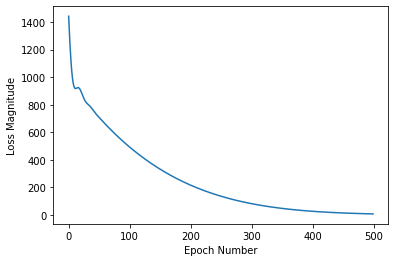

In [ ]:
# Plot the improvevment of loss (difference in y and y_pred)
plt.plot(history.history['loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')

In [ ]:
# examine the weights and bias. 
# as seen below, the two metrics are very close to the values in the function
model.get_weights()

[array([[1.8206093]], dtype=float32), array([29.276396], dtype=float32)]

In [ ]:
print(model.predict([100.0]))

[[211.33733]]


In [ ]:
# to get number of parameters it is n[l] into the n[l-1] add the bias terms of current layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


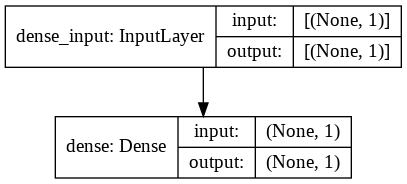

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,expand_nested=True)

# Section 3: Forward and Backward Propagation


We will work through the neurons' weights and biases to arrive at the value in the output neuron

## 3.1 Forward Propogation exercise

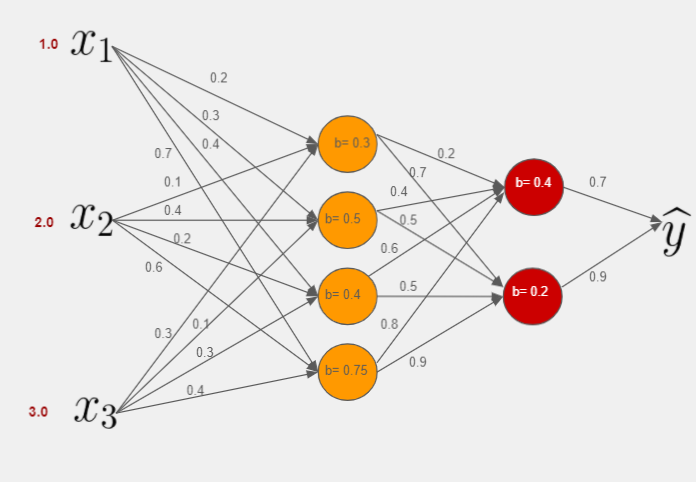

In [ ]:
# in this instance we have a set of inputs and weights,
# first step is to place the weights into matrices, node,input

input_array = np.array([1.0,2.0,3.0]).reshape(-1,1)
weight_matrix= np.array([[0.2,0.1,0.3],  # weights for node 1
                         [0.3,0.4,0.1],  # weights for node 2
                         [0.4,0.2,0.3],  # weights for node 3
                         [0.7,0.6,0.4]]) # weights for node 4

bias = np.array([0.3,0.5,0.4,0.75]).reshape(-1,1)


In [ ]:
print(f'(Shape of weight matrix: {weight_matrix.shape} x Shape of input array: {input_array.shape}) + shape of bias array: {bias.shape}' )

(Shape of weight matrix: (4, 3) x Shape of input array: (3, 1)) + shape of bias array: (4, 1)


Formula for the sigmoid function
\begin{align}
\sigma (x) =\frac{1}{1+e^{-x}}
\end{align}


In [ ]:
# multiply weight matrix by input and then add the bias
z =np.matmul(weight_matrix,input_array) + bias
z

array([[1.6 ],
       [1.9 ],
       [2.1 ],
       [3.85]])

In [ ]:
print(f'(Shape of output matrix: {z.shape}' )

(Shape of output matrix: (4, 1)


In [ ]:
#apply the sigmoid function to z
def sigmoid(x):
  
  s = 1/(1+np.exp(-x))
  
  return s

In [ ]:
a = sigmoid(z) # output
a

array([[0.83201839],
       [0.86989153],
       [0.89090318],
       [0.97916366]])

##3.2 Backward Propagation Derivation

* The idea is to take the derivative of the cost function with respect to w and b to see how we can update weights and biases to minimze the cost function $J$ using $dW$ and $db$
* In order to perform the back propagation process we will rely heavily on the chain rule
* We will use a simplified version of the neural network used in the slides to illustrate the concept
* We will use the binary cross entropy as our loss function
* We will use the sigmoid function as our activation function


Equations for forward propagation:

\begin{align}
Z^{[1]} = W^{[1]}X+b^{[1]} \\
A^{[1]} = g^{[1]}(Z^{[1]}) \\
Z^{[2]} = W^{[2]}A^{[1]}+b^{[2]} \\
{\widehat{y_{i}}} = A^{[2]} = g^{[2]}(Z^{[2]})
\end{align}


---
Cost Function:
\begin{align}
J(y_{i},{\widehat{y_{i}}}) = -\frac{\sum_{i=1}^{m}(y_{i}log({\widehat{y_{i}}})+(1-y_{i})log(1-{\widehat{y_{i}}})}{m}
\end{align}



To perform backpropagation we move from right to left

The first set will take the derivative of $J$ with respect to the weights in the second layer


\begin{align}
\frac{dJ}{dW^{[2]}} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{dW^{[2]}}
\end{align}

---
 Breaking it down into each of its components 

1.The derivative of output of cost function wrt the output of the activation function

\begin{align}
\frac{dJ}{dA^{[2]}} = \frac{-y}{A^{[2]}} + \frac{1-y}{1-A^{[2]}}
\end{align}
&nbsp;

2.The derivative of the activation function wrt z (this is just the derivative of the sigmoid function)
\begin{align}
\frac{dA^{[2]}}{dz^{[2]}} = {A^{[2]}}({1-A^{[2]}})
\end{align}
&nbsp;

3.The derivative of z wrt to w
\begin{align}
\frac{dZ^{[2]}}{dW^{[2]}} = {A^{[1]}}
\end{align}

---
Putting it altogether

\begin{align}
\frac{dJ}{dW^{[2]}} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{dW^{[2]}}
\end{align}
&nbsp; 
\begin{align}
\frac{dJ}{dw^{[2]}} = (\frac{-y}{A^{[2]}} + \frac{1-y}{1-A^{[2]}}) ({A^{[2]}}({1-A^{[2]}}))({A^{[1]}})
\end{align}

--- 
Simplifying the above expression
\begin{align}
\frac{dJ}{dW^{[2]}} = (A^{[2]}-y)*{A^{[1]}}
\end{align}


Just like backpropagation for the weights, it is very similar for the bias term

\begin{align}
\frac{dJ}{db^{[2]}} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{db^{[2]}}
\end{align}
&nbsp;

We have derived all the components from before,the last term is $\frac{dZ^{[2]}}{db^{[2]}} = 1$ 
&nbsp;

Putting it all together
\begin{align}
\frac{dJ}{db^{[2]}} =(A^{[2]}-y) * 1
\end{align}

Addtionally two other quantities will be calculated and used:
\begin{align}
{dZ^{[2]}}=\frac{dJ}{dZ^{[2]}} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}} = (A^{[2]}-y)
\end{align}
&nbsp;

\begin{align}
{dA^{[2]}}=\frac{dJ}{dA^{[2]}} = \frac{-y}{A^{[2]}} + \frac{1-y}{1-A^{[2]}}
\end{align}
This was calculated above

Now that we have derived everything for the second layer, we now focus on the first layer, all the information we derived earlier will be used for weight and bias updates of the first layer


\begin{align}
\frac{dJ}{dW^{[1]}} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{dA^{[1]}}\frac{dA^{[1]}}{dZ^{[1]}}\frac{dZ^{[1]}}{dW^{[1]}}
\end{align}

---
Splitting into its components
\begin{align}
\frac{dZ^{[2]}}{dA^{[1]}} = W^{[2]}
\end{align}
&nbsp;
\begin{align}
\frac{dA^{[1]}}{dZ^{[1]}} = {g}'(Z^{[1]})
\end{align}
&nbsp;
\begin{align}
\frac{dZ^{[1]}}{dW^{[1]}} = X = A^{[0]}
\end{align}


---
Putting it all together
\begin{align}
\frac{dJ}{dW^{[1]}} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{dA^{[1]}}\frac{dA^{[1]}}{dZ^{[1]}}\frac{dz^{[1]}}{dW^{[1]}}
\end{align}

&nbsp;

\begin{align}
\frac{dJ}{dW^{[1]}} = {dz^{[2]}} W^{[2]}{g}'(Z^{[1]})A^{[0]}
\end{align}

Similarly for the bias

\begin{align}
\frac{dJ}{db^{[1]}} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{dA^{[1]}}\frac{dA^{[1]}}{dZ^{[1]}}\frac{dZ^{[1]}}{db^{[1]}}
\end{align}

&nbsp;

\begin{align}
\frac{dJ}{db^{[1]}} = dZ^{[1]} *1
\end{align}

where we compute the values for $dZ^{[1]}$ and $dA^{[1]}$

\begin{align}
\frac{dJ}{dZ^{[1]}}=dZ^{[1]} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{dA^{[1]}}\frac{dA^{[1]}}{dZ^{[1]}}
\end{align}

&nbsp;

\begin{align}
\frac{dJ}{dA^{[1]}}=dA^{[1]} =\frac{dJ}{dA^{[2]}}\frac{dA^{[2]}}{dZ^{[2]}}\frac{dZ^{[2]}}{dA^{[1]}} = dZ^{[2]}W^{[2]}
\end{align}




Now we have the four derivatives we need $ dW^{[2]},  db^{[2]},dW^{[1]},  db^{[1]}$

\begin{align}
\frac{dJ}{dW^{[2]}}=dW^{[2]} = dZ^{[2]}A^{[1]}
\end{align}

\begin{align}
\frac{dJ}{db^{[2]}}=db^{[2]} = dZ^{[2]}
\end{align}

\begin{align}
\frac{dJ}{dW^{[1]}}=dW^{[1]} = dZ^{[1]}A^{[0]}
\end{align}

\begin{align}
\frac{dJ}{db^{[1]}}=db^{[1]} = dZ^{[1]}
\end{align}

And the four intermediate derivatives we need $ dA^{[2]},  dZ^{[2]},dA^{[1]},  dZ^{[1]}$

\begin{align}
\frac{dJ}{dA^{[2]}}=dA^{[2]} = \frac{-y}{A^{[2]}} + \frac{1-y}{1-A^{[2]}}
\end{align}

\begin{align}
\frac{dJ}{dZ^{[2]}}=dZ^{[2]} = A^{[2]}-Y
\end{align}

\begin{align}
\frac{dJ}{dA^{[1]}}=dA^{[1]} = dZ^{[2]}W^{[2]}
\end{align}

\begin{align}
\frac{dJ}{dZ^{[1]}}=dZ^{[1]} = dA^{[1]} {g}'(Z^{[1]})
\end{align}

# Section 4: Sample Loss Functions

## 4.1 Mean Squared Error

$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \widehat{y_{i}})^{2}$

In [ ]:
y_i = np.array([10,23,31,45,51])
y_i_hat = np.array([10,30,40,60,80])


In [ ]:
sum((y_i-y_i_hat)**2)/len(y_i)

239.2

* When the values are not close to the true y (ground truth values) we can see that the MSE is high

In [ ]:
y_i_hat_2 = np.array([10,20.5,30,43.25,52.25])
sum((y_i-y_i_hat_2)**2)/len(y_i)

2.375

* When the values are close close to the true y (ground truth values) we can see that the MSE is low

##4.2 Cross Entropy
$Cross \ entropy = -\frac{1}{n}\sum_{i=1}^{n}(y_{i}log(\widehat{y_{i}}))$



In [ ]:
# cross entropy examples
#correct prediction
y = np.array([0,0,1,1])
y_hat = np.array([0.1,0.1,0.7,0.9])
cross_entropy =-np.sum(y*np.log(y_hat))/len(y)
print(f'Cross Entropy is {cross_entropy}')

Cross Entropy is 0.11550886489913968


* We can see when the values are close to each other, the entropy is low

In [ ]:
#incorrect prediction
y_hat_inc = np.array([0.9,0.9,0.2,0.1])
cross_entropy =-np.sum(y*np.log(y_hat_inc))/len(y)
print(f'Cross Entropy is {cross_entropy}')

Cross Entropy is 0.9780057513570364


* We can see when the values are far apart from each other, the entropy is high

# Section 5: Training on a Multi-variate data set


## 5.1 Loading the dataset




In [ ]:
#reading the file
path = tf.keras.utils.get_file('Real_estate_valuation.csv', 
                               'https://drive.google.com/uc?id=1MJXqTZeEfsAQqm_ff9qTfZNUpFLfOjvg' )
print (path)


16384/13903 [===================================] - 0s 0us/step
/root/.keras/datasets/Real_estate_valuation.csv


In [ ]:
data = pd.read_csv('/root/.keras/datasets/Real_estate_valuation.csv')

In [ ]:
#visualizing the first 5 rows of the data
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,37.9
1,2,2012.917,19.5,306.59470,9,42.2
2,3,2013.583,13.3,561.98450,5,47.3
3,4,2013.500,13.3,561.98450,5,54.8
4,5,2012.833,5.0,390.56840,5,43.1


In [ ]:
# best practice is to always work on a copy, we set deep equal true, any changes made on the copy will not affect the original data set
real_estate = data.copy(deep=True)

## 5.2 Data Definitions
The inputs are as follows
* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)


The output is as follows
* Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)


In [ ]:
# shows the data types in the dataset
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 19.5 KB


In [ ]:
#checking if there are any null values
real_estate.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [ ]:
#dropping the number column, pandas indexing takes care of it
real_estate.drop(['No'],axis=1,inplace=True)

In [ ]:
real_estate.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


## 5.3 EDA 

We look at the descriptive statistics to see if we can get clues on how the data is strucutred

In [ ]:
#summary statistics for the data set
real_estate.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,37.980193
std,0.281967,11.392485,1262.109595,2.945562,13.606488
min,2012.667000,0.000000,23.382840,0.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,117.500000


Text(0, 0.5, 'House Price (NTD)')

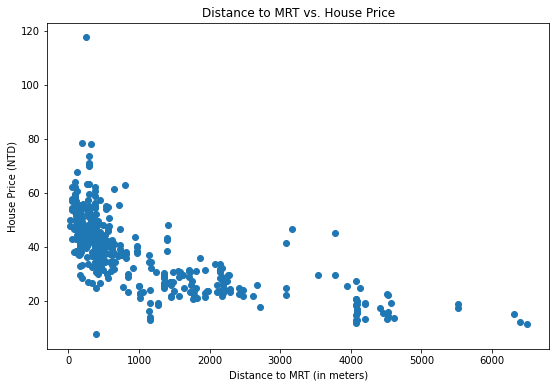

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(real_estate['X3 distance to the nearest MRT station'],data['Y house price of unit area'])
plt.title('Distance to MRT vs. House Price')
plt.xlabel('Distance to MRT (in meters)')
plt.ylabel('House Price (NTD)')

Text(0, 0.5, 'House Price (NTD)')

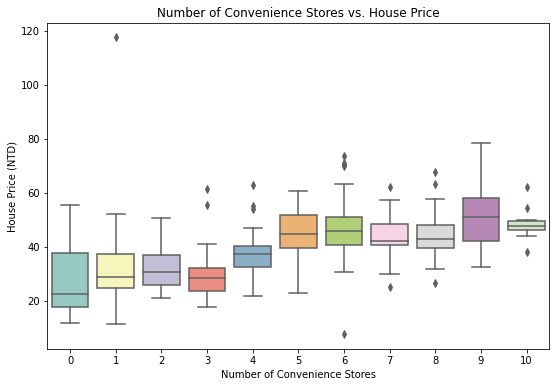

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="X4 number of convenience stores", y="Y house price of unit area",
                 data=real_estate, palette="Set3")
plt.title('Number of Convenience Stores vs. House Price')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price (NTD)')

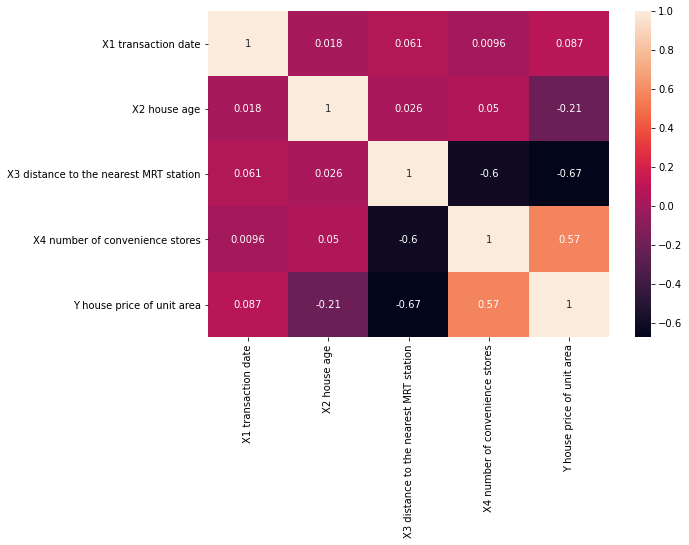

In [ ]:
corr = real_estate.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
real_estate.shape

(414, 5)

In [ ]:
#splitting into training and testing data
x = np.array(real_estate.iloc[:,1:4])
y = np.array(real_estate.iloc[:,-1]).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=False) # do we want to shuffle the data

In [ ]:
print(f' Training Data: {len(X_train),len(y_train)}, Testing Data: {len(X_test),len(y_test)}')

 Training Data: (331, 331), Testing Data: (83, 83)


In [ ]:
# We transform the data using the training data, we do not use the whole data set;
# This is to avoid any data leakage
# If we use the whole dataset, the information will leak as we will be calculating
# the minimum and maximum using all the data. 

x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(X_train)


In [ ]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))

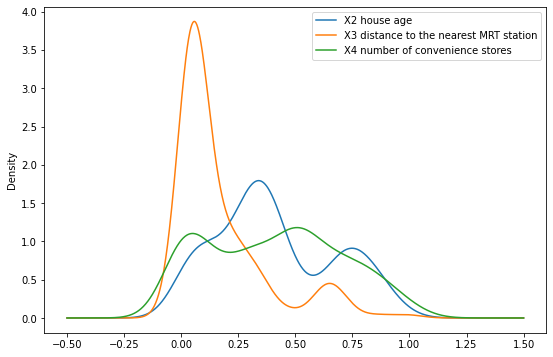

In [ ]:
pd.DataFrame(x_train_scaled,columns=real_estate.columns[1:4]).plot.kde(figsize=(9,6))

* Transaction date is dropped, because it makes no sense to scale a time
* There are many houses that close to an MRT, observe the peak in the density close to zero 

## 5.4 Build the Model
Let's start by building a multi-layer model by initating the parameters:
1. Input size (i.e. how many columns of data? 4
2. Output size how many columns of Output data? 1
3. How many layers? 1 input + 2 hidden + 1 output layer
4. What activation do I use? None specific, let's go with 2 relu's _ SGD for output layer   

### Neural Network Model N

In [ ]:
# sequential means that the layers are 'stacked'
no_neuron = 10
tf.random.set_seed(7) # ensure weights are set
model = Sequential([
                    Dense(no_neuron,activation='relu',input_dim=3,),
                    Dense(5,activation='relu'),# this is the hidden layer for our neural network, specify the number of neuron and the input dimensions
                    Dense(1)# output layer
])



In [ ]:
# Alternate method
#model= Sequential()
#model.add(Dense(no_neuron,activation='relu',input_dim=3,))
#model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


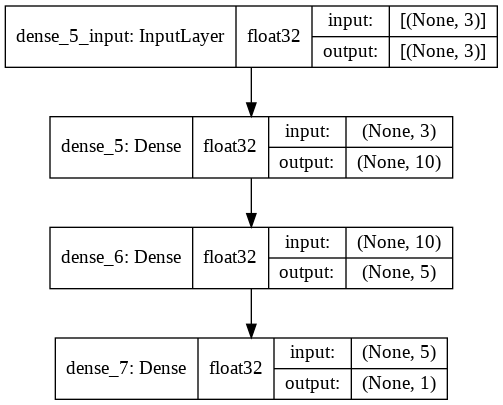

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96
)


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
history = model.fit(x_train_scaled,y_train_scaled,epochs=30,validation_split=0.2,
                    batch_size=10,verbose=0) # verbose = 0,1,2

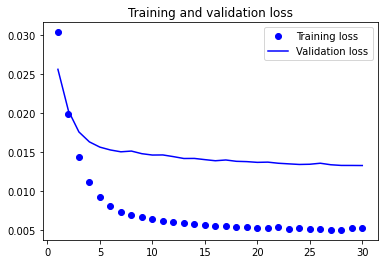

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#getting the model layers
for lay in model.layers:
  print(lay.name)
  print(lay.get_weights())
  

dense_5
[array([[ 0.3544028 , -0.36228344,  0.40743002, -0.6159824 ,  0.31895813,
         0.71725   ,  0.03839748,  0.53202987,  0.23469669, -0.54269224],
       [-0.21878244,  0.13311216, -0.7586302 , -0.5675063 ,  0.39968064,
         0.782676  , -0.07772081, -0.14514579,  0.28599772,  0.37284032],
       [ 0.4982086 , -0.26928166,  0.46167237, -0.00828737,  0.20119952,
        -0.11934268,  0.59565324,  0.06289406, -0.5841926 ,  0.1480339 ]],
      dtype=float32), array([ 0.09247212, -0.00805354,  0.08909135,  0.        ,  0.08906974,
        0.00241103, -0.03914652,  0.09223933,  0.08042641,  0.13994786],
      dtype=float32)]
dense_6
[array([[-0.60835457,  0.18930042,  0.22784391, -0.01264616,  0.10696942],
       [-0.31995496, -0.2156238 , -0.4858727 ,  0.1924329 , -0.60818934],
       [ 0.29081935, -0.583343  , -0.31848827, -0.04923392,  0.46281618],
       [ 0.24878973,  0.1168254 , -0.32243967, -0.23162931,  0.21907449],
       [ 0.0293116 , -0.60538495, -0.3235818 ,  0.02738

## 5.5 Prediction using the test data
* In order to get predicted value from our model, we need to pass in our scaled testing data into the predict method of the model

* The data must be transformed using the parameters from the training data, this is to ensure there is no data leakage

In [ ]:
#transforming the test data using the scaler we used for the training data
x_test_transform = x_scaler.transform(X_test)

In [ ]:
#predict using the transformed x test variable
predict = model.predict(x_test_transform)

In [ ]:
predict.shape

(83, 1)

In [ ]:
print(f'Predicted Value : {predict.min()} , Actual Value : {y_test.min()}' )

Predicted Value : 0.09969763457775116 , Actual Value : 11.2


In [ ]:
# we need to remove the transformation on the predicted data
y_predict = y_scaler.inverse_transform(predict)

In [ ]:
predict_df = pd.DataFrame({'True_Y':y_test[:,0],
                           'Predict_Y':y_predict[:,0]
},index=real_estate.iloc[331:,1].index.values)

In [ ]:
predict_df.head()

,True_Y,Predict_Y
331,15.6,18.906946
332,39.6,36.131130
333,38.4,50.116459
334,22.8,31.788969
335,36.5,40.808826


In [ ]:
#calculating RMSE
np.sqrt(sum(np.square(y_test - y_predict))/len(X_test))

array([7.09455813])

In [ ]:
#Calculating MSE
sum(np.square(y_test - y_predict))/len(X_test)

array([50.33275507])

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE : {mean_squared_error(y_test, y_predict)} , RMSE : {mean_squared_error(y_test, y_predict,squared=False)}' )

MSE : 50.332755072197926 , RMSE : 7.0945581308632555


Text(409, 69, 'MSE : 50.33 \nRMSE : 7.09')

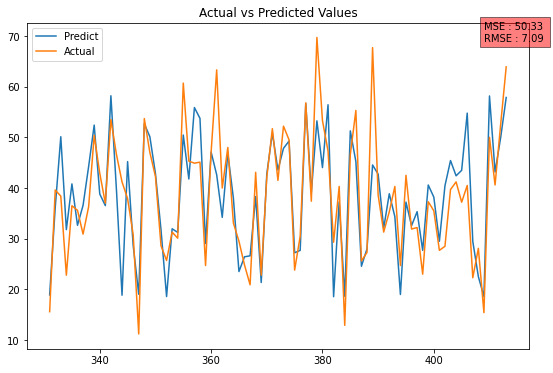

In [ ]:
# Plotting the Predicted and Actual Values
plt.figure(figsize=(9,6))
plt.plot(predict_df.index.values,predict_df['Predict_Y'],label='Predict')
plt.plot(predict_df.index.values,predict_df['True_Y'],label = 'Actual')
plt.legend(loc="upper left")
plt.title('Actual vs Predicted Values')
plt.text(409,69,f'MSE : {mean_squared_error(y_test, y_predict):.2f} \nRMSE : {mean_squared_error(y_test, y_predict,squared=False):.2f}',
         bbox=dict(facecolor='red', alpha=0.5))

In [ ]:
(0.4*-0.3) + (0.4*0.8) + (0.3*0.8) + (-0.2*-0.7)

0.5800000000000001